<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0 Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logístico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 

1. Programar la ecuación para el mapa logístico, y  realizar una grafica del valor de xn como funcion de n.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

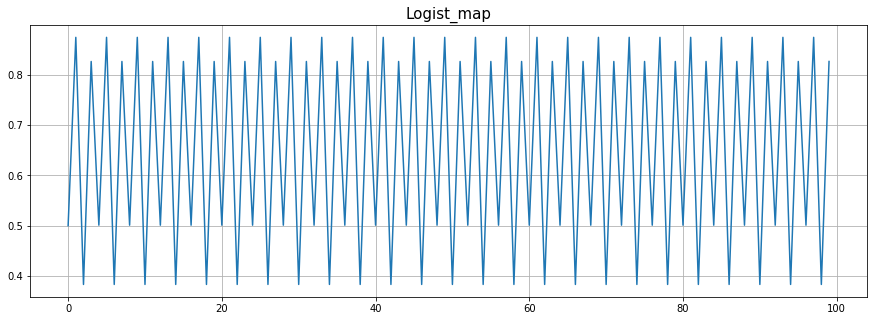

In [33]:
def logist_map(N,r,x0):
  X = np.zeros(N)
  X[0] = x0

  for i in range(1,N):
    X[i] = r * X[i-1]*(1-X[i-1])

  return X

plt.figure(figsize=(15,5))
plt.plot(logist_map(100,3.5,0.5))
plt.title('Logist_map',fontsize=15)
plt.grid()
plt.show()


2. Realizar pruebas para un $x_0=0.5$, con valores de r

```
  r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
  numpoints = 100, # Numero sugerido de iteraciones
  x0 = 0.5
```

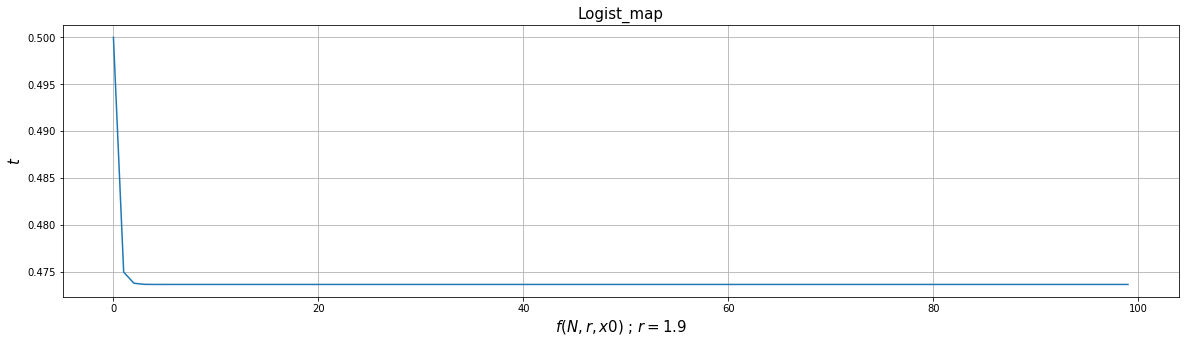

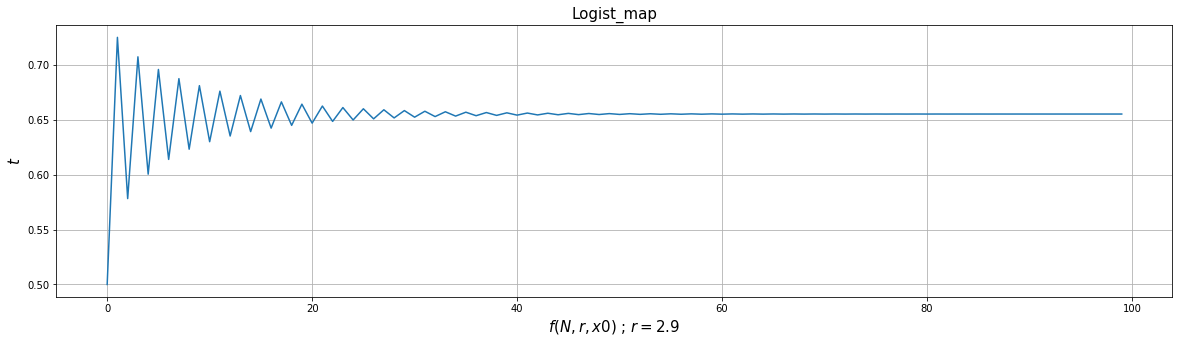

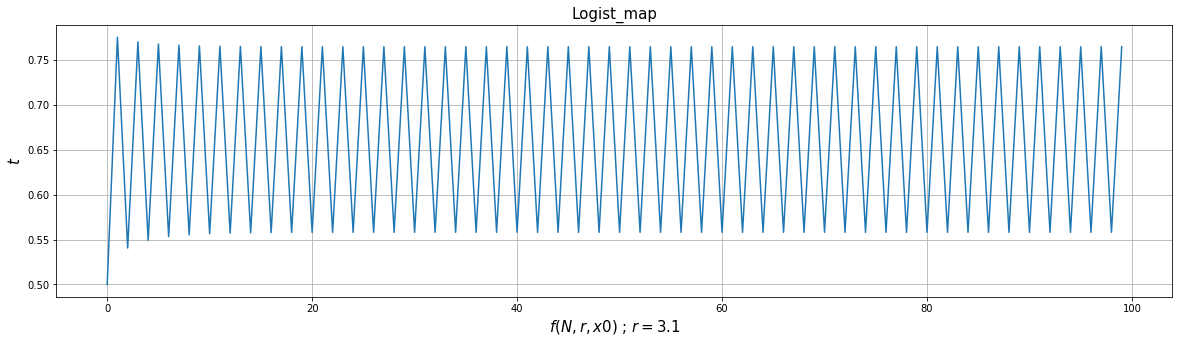

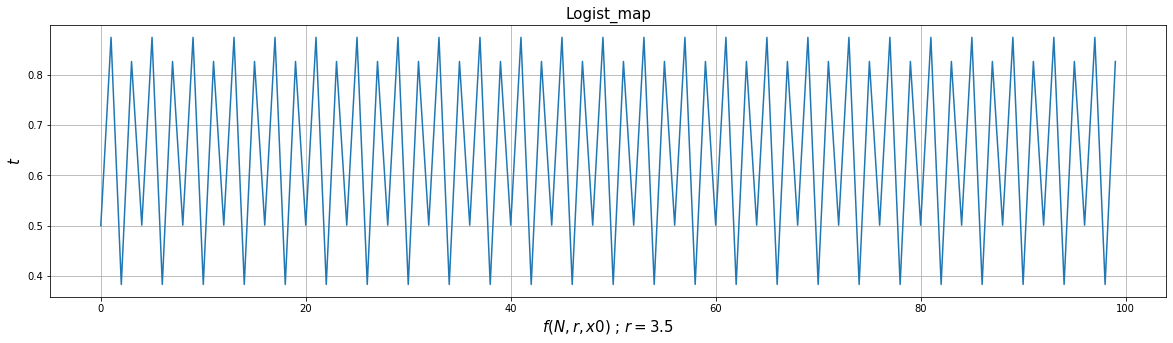

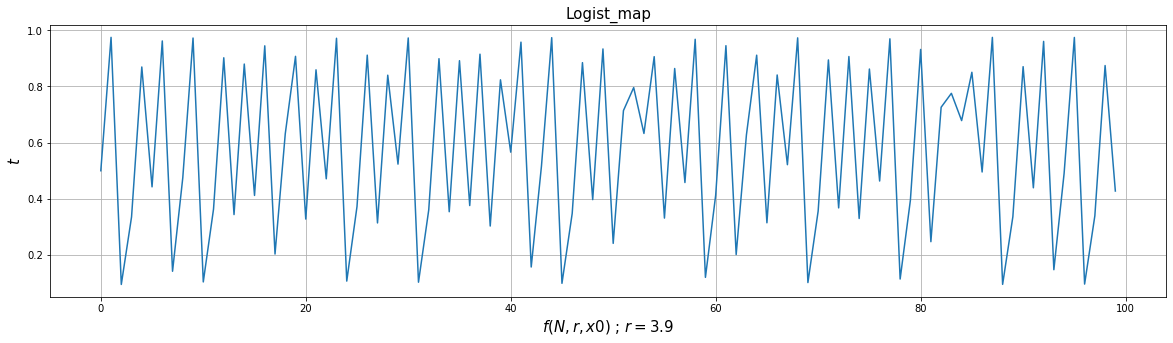

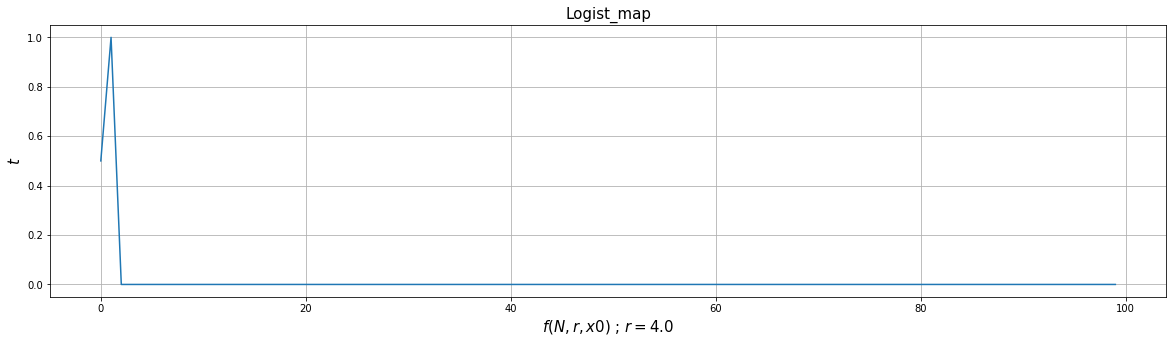

In [34]:
R = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
N = 100
x0 = 0.5

for r in R:
  plt.figure(figsize=(20,5))
  plt.plot(logist_map(N,r,x0))
  plt.title('Logist_map',fontsize=15)
  plt.ylabel('$t$',fontsize=15)
  plt.xlabel(f'$f(N,r,x0)$ ; $r = {str(r)}$',fontsize=15)
  plt.grid()
  plt.show()
  print('')


3. Construye una rutina llamada logist_map en que entrada el valor de r, la condiciones inicial xi y el número de puntos determine la evolución en el punto N.  Prueba implementado las siguientes lineas.

```
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
 
for i in range(0, Np): 
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000) 
  xf[i] = x_i
```


In [43]:
def logist_map(r,xi,N):
  X = np.zeros(int(N))
  X[0] = xi

  for i in range(1,N):
    X[i] = r*X[i-1]*(1-X[i-1])
  return X


In [51]:
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)

for i in range(0, Np): 
  xini = np.random.random(Np)
  x_i = logist_map(r = r[i], xi = xini[i], N = 1000) 
  xf[i] = x_i[-1]

4. Realiza un gráfico de:
```
  plt.plot((r-1/r), xf,  ".", markersize = 0.5)
```


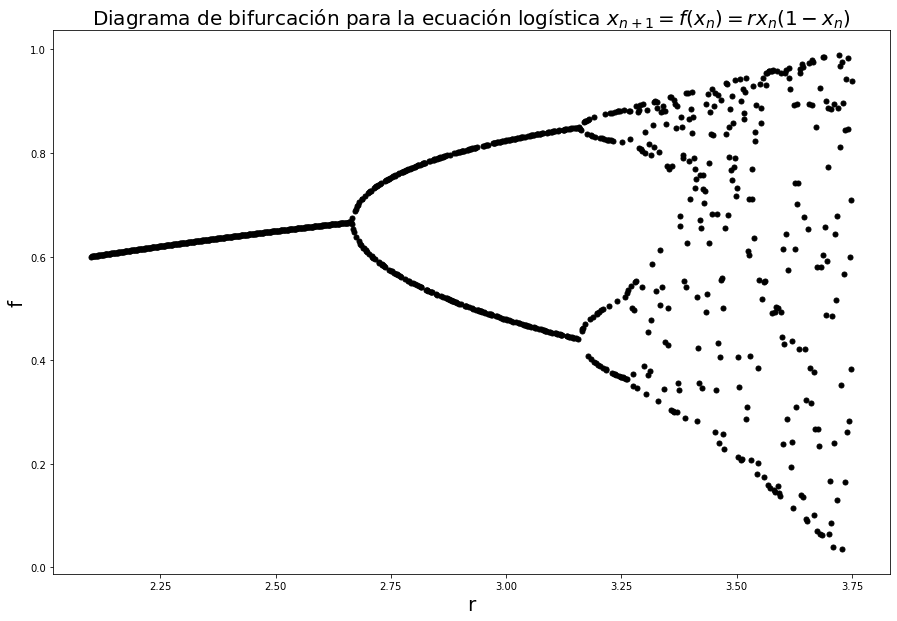

In [107]:
plt.figure(figsize=(15,10))
plt.plot((r-1/r), xf,  "ko", markersize = 5)
plt.title('Diagrama de bifurcación para la ecuación logística $x_{n+1}=f(x_n)=rx_n(1-x_n)$',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('f',fontsize=20)
plt.show()

5. Encontrar dos formas adicionales de expresar $f(x)$, para estos valores funcionales determinar las mismas gráficas del numeral 3 para cada uno de las formas de escribir la expresión. En este caso se espera que los resultados varien. ¿A que se debe esto?. La respuesta no es inmediata, constulta algunas fuentes para sacar tu propia conclusión.

De 
\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n) ; \\ x\in (0,1) \quad y \quad r\in(0,4)
\end{equation}

Se pueden sacar las dos formas adicionales de expresar $f(x)$:

\begin{equation}
x_{n+1}=f(x_n)=rx_n^2(\frac{1}{x_n}-1) ; \quad (1) \\
x_{n+1}=f(x_n)=r(x_n-x_n^2) ; \quad (2)
\end{equation}

In [93]:
#De (1)
def logist_map1(r,xi,N):
  X = np.zeros(int(N))
  X[0] = xi

  for i in range(1,N):
    X[i] = r * X[i-1]**2*((1/X[i-1])-1)
  return X

In [94]:
#De (2)
def logist_map2(r,xi,N):
  X = np.zeros(int(N))
  X[0] = xi

  for i in range(1,N):
    X[i] = r * (X[i-1]-X[i-1]**2)
  return X

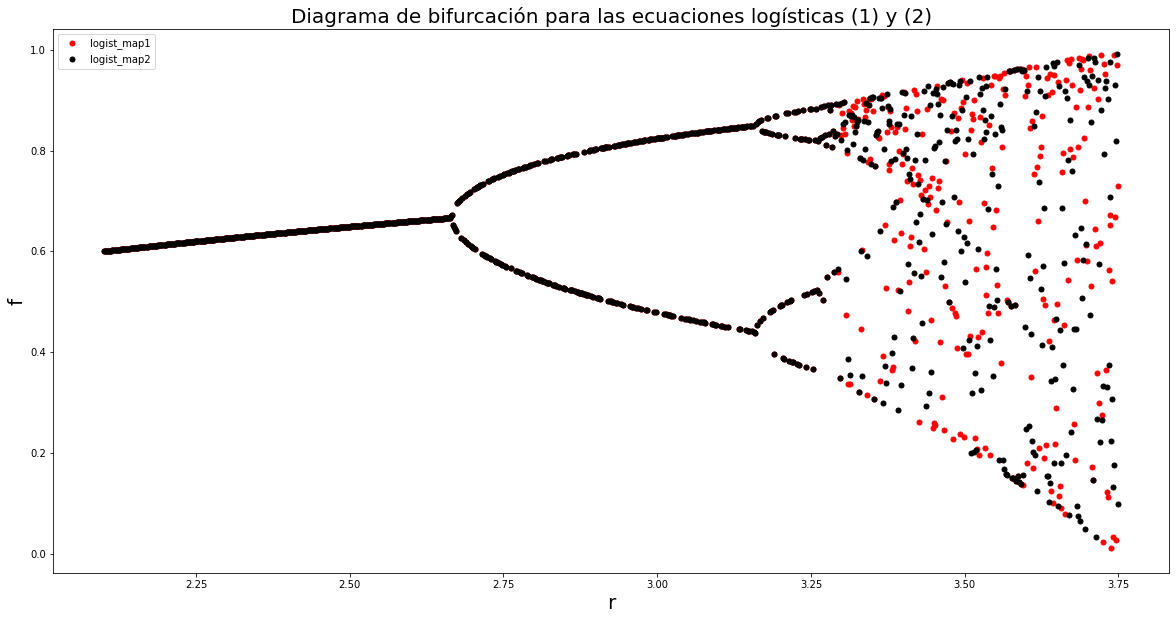

In [106]:
#Diagrama de bifurcación para las ecuaciones logísticas (1) y (2).

Np = 1000
xf1 = np.zeros(Np)
xf2 = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)

for i in range(0, Np): 
  xini = np.random.random(Np)
  x_i1 = logist_map1(r = r[i], xi = xini[i], N = Np) 
  x_i2 = logist_map2(r = r[i], xi = xini[i], N = Np)  
  xf1[i] , xf2[i]= x_i1[-1],x_i2[-1]

plt.figure(figsize=(20,10))
plt.plot((r-1/r), xf1,  "ro", markersize = 5,label="logist_map1")
plt.plot((r-1/r), xf2,  "ko", markersize = 5,label="logist_map2")
plt.title('Diagrama de bifurcación para las ecuaciones logísticas (1) y (2)',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('f',fontsize=20)
plt.legend()
plt.show()

La ecuación (1) y (2) se diferencian en las operaciones que debe realizar la computadora, en (1) tiene que hacer una división, cosa que no ocurre en (2). Por tanto, los resultados varían por las consideraciones que tiene la computadora de número de puntos flotantes y errores de redondeo para cada operación.  

2.0 El algoritmo de gradiente descendente permite encontrar el minimo de funciones en espacios multidimensionales proponiendo puntos en la direccion en la que el gradiente desciende. Para el caso de una dimensión, podemos encontrar el mínimo realizando iteraciones y multiplicando su derivada en cada nuevo punto por una constante $\alpha$

\begin{equation}
x_{i+1}=x_i - \alpha \frac{\mathrm{d}f}{\mathrm{d}x}(x_i)
\end{equation}




Ejemplo:

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual 
la derivada de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función 


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo. 



**Su tarea será**:

1. Disenar un programa, en el que entrada la función y su derivada, definidas como funciones lambda de python, se determine el valor mínimo de esa función. 
Prueba tu algoritmo para  la función $f(x) = x^2$


En la siguiente función **grad_d** vamos a utilizar una variable de nombre **n_iteration** que es el número de interacciones que va realizar la función para encontrar el valor mínimo de **f(x)**. Es evidente que entre mayor sea el número de interacciones mejor será el resultado.

In [57]:
def grad_d(function,gradient,x0,alpha,n_iteration):
  L = np.zeros(n_iteration)
  L[0] = x0
  for i in range(1,n_iteration):
    L[i] = L[i-1] - alpha * gradient(L[i-1])  
  return L

In [58]:
f = lambda x: x**2
df = lambda x: 2*x
x0 = randint(-10,10)
alpha = 0.1
n_iteration = 100

x_minf = grad_d(f, df, x0, alpha,n_iteration)[-1]
print("El mínimo de la función es: %.10f"% abs(x_minf))


El mínimo de la función es: 0.0000000000


En la siguiente función **grad_desc** vamos a utilizar una variable de nombre **epsilon** que será una medida de la precisión deseada en el cálculo del mínimo de **f(x)**.

In [59]:
def grad_desc(f, df, x0, alpha, epsilon):
    x = x0
    while True:
        x_next = x - alpha * df(x)
        # comprobar si se ha alcanzado el criterio de parada
        if abs(x_next - x) < epsilon:
            break
        x = x_next
    return x

In [60]:
f = lambda x: x**2
df = lambda x: 2*x
x0 = randint(-10,10)
alpha = 0.1
epsilon = 0.0000001

x_minw = grad_desc(f, df, x0,alpha,epsilon)
print("El mínimo de la función es: %.10f"% abs(x_minw))

El mínimo de la función es: 0.0000004853


2. Realiza el grafico de la funcion y la derivada, especifica la leyenda de cada curva empleando el metodo legend() de matplotlib.

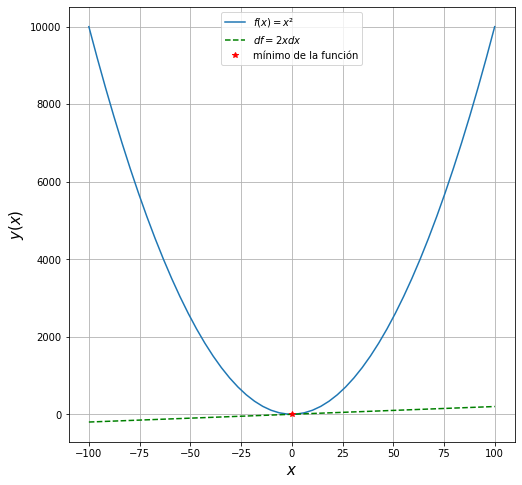

In [61]:
x = np.linspace(-100,100)
f = lambda x: x**2
df = lambda x: 2*x


plt.figure(figsize=(8,8))

plt.plot(x,f(x),label='$f(x)=x²$')
plt.plot(x,df(x),'g--',label='$df = 2x dx$')
plt.plot(0, f(0), 'r*', label="mínimo de la función")

plt.legend(loc='upper center',fontsize=10)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y(x)$',fontsize=15)
plt.grid()

3. Analiza como se minimiza la función, gráficando de la funcion en cada punto a iterar,  como funcion del numero de iteraciones. Para dos valores diferentes de la constante alpha (prueba con $\alpha=0.1$, $\alpha=0.01$)

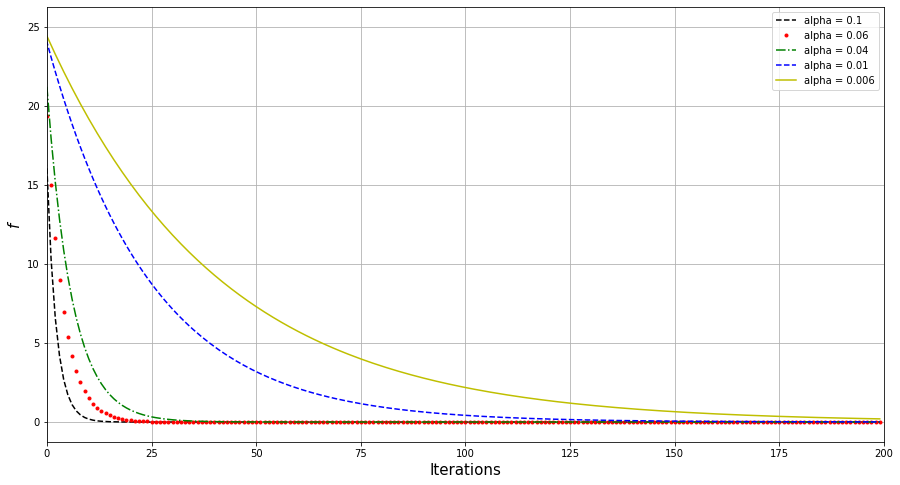

In [62]:
f = lambda x: x**2
df = lambda x: 2*x

x0 = -5
n_iteraciones = 200

alphas = [0.1,0.06,0.04,0.01,0.006]
colors = ['k--','r.','g-.','b--','y','c']


plt.figure(figsize=(15,8))

for j,alpha in enumerate(alphas):
    x = x0
    iterations = [x]
    y = [f(x)]

    for i in range(n_iteraciones):
        x = x - alpha * df(x)
        y.append(f(x))
        iterations.append(i)

    plt.plot(iterations,y,colors[j],label = f'alpha = {str(alpha)}')  

plt.grid()
plt.xlim(0,200)
plt.ylabel('$f$',fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.legend()
plt.show()

Vemos que para **alpha = 0.1** la funcion alcanza el valor del minimo con menos interacciones.
